<a href="https://colab.research.google.com/github/nozhanb/Awesome-Geospatial/blob/master/retinaNetTestRun.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/fizyr/keras-retinanet.git

Cloning into 'keras-retinanet'...
remote: Enumerating objects: 37, done.
remote: Counting objects: 100% (37/37), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 5367 (delta 15), reused 18 (delta 9), pack-reused 5330
Receiving objects: 100% (5367/5367), 13.32 MiB | 13.43 MiB/s, done.
Resolving deltas: 100% (3575/3575), done.


In [6]:
ls

CONTRIBUTORS.md  keras_retinanet/  requirements.txt  snapshots/
examples/        LICENSE           setup.cfg         tests/
images/          README.md         setup.py


In [7]:
!pip install . --user

Processing /content/keras-retinanet
  Created wheel for keras-retinanet: filename=keras_retinanet-0.5.1-cp36-cp36m-linux_x86_64.whl size=169835 sha256=785980bbc2e3c05922243df836095e62f21dcfd3923d0bf6b586c625f6c60ef5
  Stored in directory: /root/.cache/pip/wheels/b2/9f/57/cb0305f6f5a41fc3c11ad67b8cedfbe9127775b563337827ba
  Created wheel for keras-resnet: filename=keras_resnet-0.1.0-py2.py3-none-any.whl size=13344 sha256=81f90ebb711cd7169dd719690be64822afecd9e2b638e1e50a19560fad595c3c
  Stored in directory: /root/.cache/pip/wheels/80/dd/ac/842235b63dddac12faa4b48ebe58b8944e8c2e57c2e38dddb6
Successfully built keras-retinanet keras-resnet
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [61]:
!python setup.py build_ext --inplace

running build_ext
skipping 'keras_retinanet/utils/compute_overlap.c' Cython extension (up-to-date)
copying build/lib.linux-x86_64-3.6/keras_retinanet/utils/compute_overlap.cpython-36m-x86_64-linux-gnu.so -> keras_retinanet/utils


In [62]:
%matplotlib inline

# automatically reload modules when they have changed
%load_ext autoreload
%autoreload 2

# import keras
import keras
# import keras_retinanet
from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color
from keras_retinanet.utils.gpu import setup_gpu

# import miscellaneous modules
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import time

# use this to change which GPU to use
gpu = 0

# set the modified tf session as backend in keras
setup_gpu(gpu)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [92]:
for path in sys.path:
  print (path)


/env/python
/usr/lib/python36.zip
/usr/lib/python3.6
/usr/lib/python3.6/lib-dynload
/usr/local/lib/python3.6/dist-packages
/usr/lib/python3/dist-packages
/usr/local/lib/python3.6/dist-packages/IPython/extensions
/root/.ipython


In [104]:
%cd /usr/local/lib/python3.6/dist-packages
#!pwd
!ls

/usr/local/lib/python3.6/dist-packages
absl
absl_py-0.8.1.dist-info
alabaster
alabaster-0.7.12.dist-info
albumentations
albumentations-0.1.12.dist-info
altair
altair-3.2.0.dist-info
apiclient
astor
astor-0.8.0.dist-info
astropy
astropy-3.0.5.dist-info
atari_py
atari_py-0.2.6.dist-info
atomicwrites
atomicwrites-1.3.0.dist-info
attr
attrs-19.3.0.dist-info
audioread
audioread-2.1.8.dist-info
autograd
autograd-1.3.dist-info
babel
Babel-2.7.0.dist-info
backcall
backcall-0.1.0.dist-info
backports
backports.tempfile-1.0.dist-info
backports.weakref-1.0.post1.dist-info
beautifulsoup4-4.6.3.dist-info
bin
bleach
bleach-3.1.0.dist-info
blis
blis-0.2.4.dist-info
bokeh
bokeh-1.0.4.dist-info
boto
boto-2.49.0.dist-info
boto3
boto3-1.10.27.dist-info
botocore
botocore-1.13.27.dist-info
bottleneck
Bottleneck-1.3.1.dist-info
branca
branca-0.3.1.dist-info
bs4
bs4-0.0.1.dist-info
bson
bz2file-0.98.dist-info
bz2file.py
cachetools
cachetools-3.1.1.dist-info
caffe2
certifi
certifi-2019.9.11.dist-info
cffi
cffi

In [105]:
#%cd /root/.local/lib/python3.6/site-packages
#%cp -r * /usr/local/lib/python3.6/dist-packages



/root/.local/bin


In [0]:
#import os
#os.environ['PATH'] += ":/root/.local/lib/python3.6"
#os.environ['PATH'] += ":/root/.local/lib/python3.6/site-packages"
#os.environ['PATH'] += ":/root/.local/bin"

In [0]:
#!pip install keras-resnet
#!pip install keras-retinanet --user

In [139]:
model_path = os.path.join('snapshots', 'resnet50_coco_best_v2.1.0.h5')
print(model_path)

snapshots/resnet50_coco_best_v2.1.0.h5


In [127]:
# load retinanet model
model = models.load_model(model_path, backbone_name='resnet50')

OSError: ignored

In [138]:
!pwd
!ls

/content/keras-retinanet/snapshots
example.txt  resnet50_coco_best_v2.1.0.h5


In [140]:
model_path = os.path.join('snapshots', 'resnet50_coco_best_v2.1.0.h5')
print(model_path)

snapshots/resnet50_coco_best_v2.1.0.h5


In [141]:
%cd ..

/content/keras-retinanet


In [142]:
# load retinanet model
model = models.load_model(model_path, backbone_name='resnet50')







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where






/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:310: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [0]:
# load label to names mapping for visualization purposes
labels_to_names = {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 68: 'microwave', 69: 'oven', 70: 'toaster', 71: 'sink', 72: 'refrigerator', 73: 'book', 74: 'clock', 75: 'vase', 76: 'scissors', 77: 'teddy bear', 78: 'hair drier', 79: 'toothbrush'}

processing time:  7.166733264923096


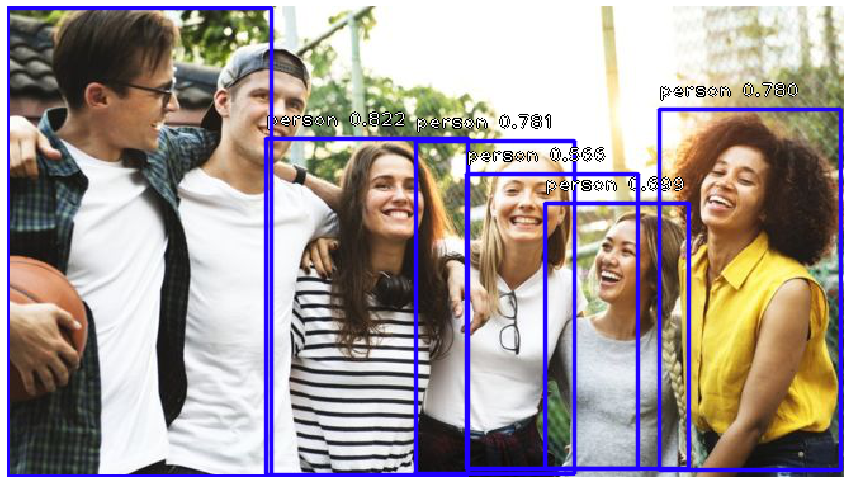

In [144]:
# load image
image = read_image_bgr('testImage.jpg')

# copy to draw on
draw = image.copy()
draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

# preprocess image for network
image = preprocess_image(image)
image, scale = resize_image(image)

# process image
start = time.time()
boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis=0))
print("processing time: ", time.time() - start)

# correct for image scale
boxes /= scale

# visualize detections
for box, score, label in zip(boxes[0], scores[0], labels[0]):
    # scores are sorted so we can break
    if score < 0.5:
        break
        
    color = label_color(label)
    
    b = box.astype(int)
    draw_box(draw, b, color=color)
    
    caption = "{} {:.3f}".format(labels_to_names[label], score)
    draw_caption(draw, b, caption)
    
plt.figure(figsize=(15, 15))
plt.axis('off')
plt.imshow(draw)
plt.show()